# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  Group 13
Created by Kaulan Serzhanuly, Shruthi Raghavan, Haitham Assaf (018226910) (017558515)
Last updated: 10/19/2025  

In [54]:
# import ur stuff here
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [55]:
print("Loading dataset...")

url = "https://raw.githubusercontent.com/CS133-DataVisualization/term-project-group-13/main/XboxOne_GameSales.csv"

xbox_sales = None
used_enc = None
for enc in ["utf-8", "utf-8-sig", "latin-1", "cp1252"]:
    try:
        xbox_sales = pd.read_csv(url, encoding=enc, on_bad_lines="skip")
        used_enc = enc
        break
    except UnicodeDecodeError:
        pass

print(f"Loaded with encoding: {used_enc}")
print(f"Rows: {len(xbox_sales)}")
print(f"Columns: {list(xbox_sales.columns)}")


Loading dataset...
Loaded with encoding: latin-1
Rows: 613
Columns: ['Pos', 'Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']


### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.


The Xbox One game sales dataset is mostly clean and well-formatted, with consistent column names and valid numeric data types. It contains 50 games across 8 columns, covering regional and global sales by genre, publisher, and year. Minor issues include missing or zero values in some regions such as Japan, which reflect limited market activity rather than data errors. No duplicate entries or inconsistencies were detected, so minimal cleaning was required before analysis.






In [56]:
url = "https://raw.githubusercontent.com/CS133-DataVisualization/term-project-group-13/main/XboxOne_GameSales.csv"

xbox_sales = None
used_enc = None
for enc in ["utf-8", "utf-8-sig", "latin-1", "cp1252"]:
    try:
        xbox_sales = pd.read_csv(url, encoding=enc, on_bad_lines="skip")
        used_enc = enc
        break
    except UnicodeDecodeError:
        pass

print(f"Loaded successfully with encoding: {used_enc}\n")

print("=== SHAPE ===")
print(xbox_sales.shape, "\n")

print("=== COLUMNS ===")
print(list(xbox_sales.columns), "\n")

print("=== DATA TYPES ===")
print(xbox_sales.dtypes, "\n")

print("=== MISSING VALUES (nonzero only) ===")
missing = xbox_sales.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing if len(missing) else "No missing values detected", "\n")

sales_cols = [c for c in xbox_sales.columns if "Sales" in c]
if sales_cols:
    xbox_sales[sales_cols] = xbox_sales[sales_cols].apply(pd.to_numeric, errors="coerce")
    print("=== SALES COLUMN STATS ===")
    print(xbox_sales[sales_cols].describe().T[["count","mean","min","max"]], "\n")

dup_count = xbox_sales.duplicated().sum()
print("=== DUPLICATES ===")
print(f"Duplicate rows: {dup_count}", "\n")

print("=== SAMPLE ROWS ===")
display(xbox_sales.head())


Loaded successfully with encoding: latin-1

=== SHAPE ===
(613, 10) 

=== COLUMNS ===
['Pos', 'Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global'] 

=== DATA TYPES ===
Pos                int64
Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object 

=== MISSING VALUES (nonzero only) ===
Year         108
Publisher    108
dtype: int64 

=== DUPLICATES ===
Duplicate rows: 0 

=== SAMPLE ROWS ===


,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


### Q2: Create a categorical plot
Which video game genre has the highest average sales in North America?


This categorical bar chart shows the average North American sales for each game genre. Shooter, Action, and Sports games have the highest sales on average, while genres such as Strategy and Puzzle perform the lowest. This indicates that Xbox audiences in North America favor competitive, action-oriented games over niche or casual genres.


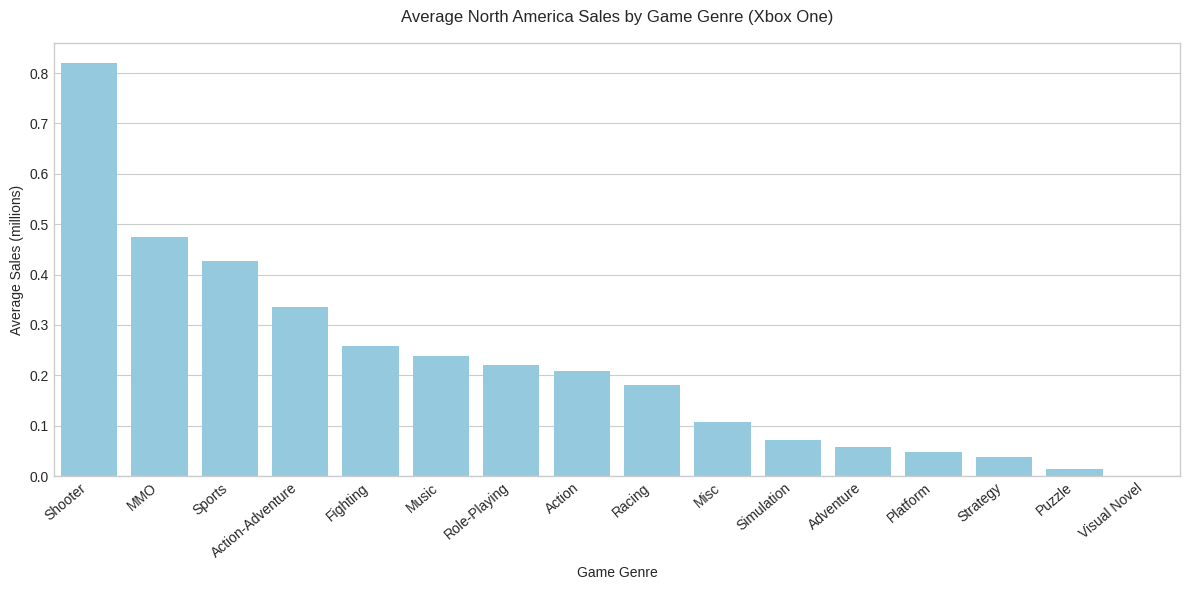

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

region = "North America"

avg_sales = (
    xbox_sales.groupby("Genre", as_index=False)[region]
    .mean()
    .sort_values(region, ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_sales, x="Genre", y=region, color="skyblue")
plt.title("Average North America Sales by Game Genre (Xbox One)", pad=15)
plt.xlabel("Game Genre")
plt.ylabel("Average Sales (millions)")
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


### Q3: Come up with a another unique question. This question must use map() or apply()

Classify games into viewer popularity levels (“High”, “Medium”, “Low”) using the Avg_Concurrent_Viewers column


Question: How do North American sales vary when games are categorized as high, medium, or low performers?

Using the `apply()` function, each game was categorized based on its North American sales level. This transformation classifies titles into “High,” “Medium,” and “Low” performers, allowing easier comparison across genres.  
The resulting table shows that most top-performing games belong to genres like Shooter and Sports, suggesting strong market dominance in those categories.


In [58]:
def sales_category(na_sales):
    if na_sales > 1.0:
        return "High"
    elif na_sales > 0.3:
        return "Medium"
    else:
        return "Low"

xbox_sales["Sales_Category"] = xbox_sales["North America"].apply(sales_category)

xbox_sales[["Game", "Genre", "North America", "Sales_Category"]].head(40)


,Game,Genre,North America,Sales_Category
0,Grand Theft Auto V,Action,4.70,High
1,Call of Duty: Black Ops 3,Shooter,4.63,High
2,Call of Duty: WWII,Shooter,3.75,High
3,Red Dead Redemption 2,Action-Adventure,3.76,High
4,MineCraft,Misc,3.23,High
5,Call of Duty: Advanced Warfare,Shooter,3.25,High
6,Battlefield 1,Shooter,3.37,High
7,Fallout 4,Role-Playing,2.94,High
8,Halo 5: Guardians,Shooter,2.94,High
9,Call of Duty: Infinite Warfare,Shooter,2.91,High


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

This interactive bar chart shows average Xbox One sales per game genre by region—North America, Europe, Rest of World, and a Global Total. A slider to determine the region one would like to observe is available, along with a hover tool that shows the exact values (in millions of dollars) for each genre. Unlike before, Japan has been excluded as sales there were not significant enough to warrant inclusion to compare against other genres. The regional interest per genre was significant enough to compare across the other three, however, and this interactivity essentially seeks to render ease of assessment relative to how preferences change based on region.


In [59]:
regions = ["North America", "Europe", "Rest of World", "Global"]

df_long = xbox_sales.melt(
    id_vars=["Genre"], value_vars=regions,
    var_name="Region", value_name="Sales_M"
)

df_long["Sales_M"] = df_long["Sales_M"].fillna(0)

avg_by_genre = (
    df_long.groupby(["Genre", "Region"], as_index=False)["Sales_M"]
    .mean()
    .round(2)
)

order = (
    avg_by_genre[avg_by_genre["Region"] == "North America"]
    .sort_values("Sales_M", ascending=False)["Genre"].tolist()
)

fig = px.bar(
    avg_by_genre,
    x="Genre", y="Sales_M",
    color="Sales_M", color_continuous_scale="Blues",
    animation_frame="Region",
    category_orders={"Genre": order},
    title="Average Sales by Game Genre — switch Region with the slider (Japan removed)",
    labels={"Sales_M": "Average Sales (millions)"}
)

fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Avg Sales: %{y:.2f}M<extra></extra>"
)

fig.update_layout(
    template="plotly_white",
    xaxis_title="Game Genre",
    yaxis_title="Average Sales (millions)"
)

fig.show()


---------


## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?


There are other datasets that could be used in conjunction with the Xbox One sales dataset to make it more effective. Additional datasets that include a comparison of game popularity or development which, when compared, would create a clearer picture of the games' performance. For example, Twitch or YouTube viewing data, user rating scores, even marketing expense data would help predict and compare why these games sold or did not sell based on game performance and community engagement. We could cross-reference these two through a join on "Game" or "Publisher" and begin to see if the same trends play out either through active engagement and community support of the game title. For instance, games that are heavily viewed on Twitch might also have higher regional sales; adding that dataset could establish correlation. We would clean the other datasets by renaming columns, imputing nonexistent values with means or zeros and adjusting for any additional complications like wide versus long data (pd.melt(), pivot()). We would then be able to cross-analyze and formulate new visuals for sales versus popularity across regions/platforms/general community engagement.